In [27]:
import pandas as pd

df = pd.read_csv('amlo_clasify_chatpgt3.csv')
#df = df.head(50)
#df.reset_index(inplace=True)
df

,Texto,Clasificacion,new_classification,classification_spanish,clean,vector
0,Buenos días y feliz año. Deseamos que nos vay...,saludos,Support,apoyo,buenos días feliz año deseamos vaya bien mexic...,[ 7.19675303e-01 8.39907408e-01 -9.76106763e-...
1,Vamos a iniciar la semana como lo hacemos siem...,NaN,Health,salud,vamos iniciar semana hacemos siempre lunes qui...,[-9.91302952e-02 8.24222326e-01 -3.38856429e-...
2,También vamos a informar este primer día hábil...,apoyo,Support,apoyo,vamos informar primer día hábil año 2023 dispe...,[ 0.24504176 0.97794175 0.8164164 -1.316901...
3,Y ahora se va a informar porque se está optand...,apoyo,Support,apoyo,ahora va informar optando calendario acuerdo l...,[ 4.9537131e-01 8.0378938e-01 2.1846922e-01 ...
4,En esta etapa se combinan los bancos particula...,apoyo,Support,apoyo,etapa combinan bancos particulares comerciales...,[ 0.18309724 1.2687184 0.7949024 -1.846111...
...,...,...,...,...,...,...
21721,"Cuando los presidentes de América del Sur, alg...",NaN,Opinion,opinion,presidentes américa sur amigo argentina gobier...,[ 1.3192350e+00 4.9044394e-01 -3.4768179e-01 ...
21722,Porque nada más se habla de la crisis de Argen...,NaN,Corruption,corrupcion,habla crisis argentina luego toda culpa gobier...,[ 1.50993967e+00 9.18410122e-01 -7.97233939e-...
21723,"Entonces, sí se firmó la carta, la enviamos. L...",NaN,Support,apoyo,entonces firmó carta enviamos firmó presidente...,[ 1.047604 0.184356 -0.7643434 -1.752564...
21724,"Y hemos estado ayudando en todo, y hace falta ...",NaN,Support,apoyo,ayudando hace falta apoye argentina además bueno,[ 9.56562877e-01 1.70733139e-01 -1.05751717e+...


In [55]:
import os
with open(r'C:\Users\claud\Documents\Descargas\open_ai_adri.txt') as f:
    os.environ["OPENAI_API_KEY"] = f.readline()

from langchain.chat_models import ChatOpenAI

llm = ChatOpenAI(model_name= "gpt-3.5-turbo", request_timeout =30, verbose = True, max_retries = 5)


from langchain.schema.messages import HumanMessage, SystemMessage
prompt='''
You are a virtual assistant, who only knows how to classify texts in Spanish

The classifications that you should take into account are:
Security: talk about security in Mexico such as police force, military, criminal cases, etc.
History: facts from the history of Mexico or the world, such as historical figures, historical buildings etc. no comments.
Economy: Refers to anything economical about mexico
Foreign: Talk about how other countries get involved with Mexico or how Mexico impacts abroad, also about migration.
Opinion:  Personal opinion on any topic. 
Health: Health situation in Mexico.
Support: social and financial support to communities, older adults, indigenous people, etc.
Corruption: About the wrongdoings of other groups or organizations including political parties and private organizations.
Opposition:  Opposed to certain ideas or thoughts, even opposition or badmouthing about a person.
Construction: Infrastructure built or purchased for  Mexico.


The answer should only be one word for each sentence

Given you are the virtual assistant classify the following 10 sentences from the Mexico president, AMLO,
The format of the sentences are enclosed by quotation marks and separated with commas.

'''

In [8]:
result = []
indice = 0
result2 = []

#decena_de_enunciados = ""
for i in range(0, len(df), 10):
    result.append('","'.join(df['Texto'].iloc[i:i+10]))
    result[indice] = '"' + result[indice]
    result[indice] = result[indice] + '"'
    indice+=1
#for i in range(0, len(df) - 5, 10):
#    decena_de_enunciados = ""
#    for j in range(10):
#        decena_de_enunciados = decena_de_enunciados + f"{j+1}. "
#        decena_de_enunciados = decena_de_enunciados + df["Texto"].iloc[i+j] + '\n'
#    result2.append(decena_de_enunciados)

    

In [3]:
inicio = df["new_classification"].index.get_loc(df['new_classification'].last_valid_index())
inicio = (inicio + 1) //10
print(inicio)
fin = len(df) //10
print(fin)

2172
2172


In [9]:

import re
import numpy as np

In [45]:
df

,Texto,Clasificacion,new_classification,classification_spanish
0,Buenos días y feliz año. Deseamos que nos vay...,saludos,,NaN
1,Vamos a iniciar la semana como lo hacemos siem...,NaN,,NaN
2,También vamos a informar este primer día hábil...,apoyo,,NaN
3,Y ahora se va a informar porque se está optand...,apoyo,,NaN
4,En esta etapa se combinan los bancos particula...,apoyo,,NaN
...,...,...,...,...
21721,"Cuando los presidentes de América del Sur, alg...",NaN,,NaN
21722,Porque nada más se habla de la crisis de Argen...,NaN,,NaN
21723,"Entonces, sí se firmó la carta, la enviamos. L...",NaN,,NaN
21724,"Y hemos estado ayudando en todo, y hace falta ...",NaN,,NaN


In [64]:
def clasificate_csv(text):

        response = llm.invoke(
                [SystemMessage(content=prompt), HumanMessage(content=text)]
            )
        return response.content

def classify_df():    
    
    inicio = df["new_classification"].index.get_loc(df['new_classification'].last_valid_index())
    inicio = (inicio + 1) //10 
    fin = len(df) //10
    query_is_not_ten = True
    for i in range(0,1):
        query_is_not_ten = True
        while query_is_not_ten:
            resultado_de_la_clasificacion = clasificate_csv(result[i])
            print(resultado_de_la_clasificacion)
            if len(resultado_de_la_clasificacion.split(", ")) == 10:
                query_is_not_ten = False
            else:
                query_is_not_ten = True
            print(f"Repeticion {i}")
        
        df.iloc[i*10:(i+1)*10, 2] = resultado_de_la_clasificacion.split(", ")
        df.to_csv('amlo_clasify_chatpgt4.csv', index=False)
        print("Fin de la asignacion")
    
def classify_df_enumerate():
    for i in range(5):
        resultado_de_la_clasificacion = clasificate_csv(result2[i])
        resultado_de_la_clasificacion = re.sub(r'([^A-Za-z\r\n\t])', '',resultado_de_la_clasificacion)
        print(resultado_de_la_clasificacion.split("\n"))
        print(len(resultado_de_la_clasificacion.split("\n")))
        print(type(resultado_de_la_clasificacion))
       
        df.iloc[i*10:(i+1)*10, 3] = resultado_de_la_clasificacion.split("\n")
        #df.to_csv('amlo_clasify_chatpgt2.csv', index=False)
        print("Fin de la asignacion")    
    

In [65]:
classify_df()

Opinion, Support, Support, Support, Support, Support, Support, Security, Construction, Security
Repeticion 0
Fin de la asignacion


In [67]:
mapper = {
    'Support': "apoyo",
    '\nSupport': "apoyo",
    'Support.': "apoyo",
    'Health': "salud",
    'Security': "seguridad",
    'Security.': "seguridad",
    "History": "historia",
    "Economy": "economia",
    "Economy.": "economia",
    "Opposition": "competencia",
    "Oppostion": "competencia",
    "Opposition.": "competencia",
    "Opinion": "opinion",
    "Foreign": "exterior",
    "Foreign.": "exterior",
    "Construction": "construccion",
    "Construction.": "construccion",
    "Corruption": "corrupcion",
    "Corruption.": "corrupcion",
    "Migration": "exterior",
    
    
    "Oposición": "competencia",
    "Vivienda": "construccion",
    "Seguridad": "seguridad",
    "Historia": "historia",
    "Apoyo": "apoyo",
    "Economia": "economia",
    "Economía": "economia",
    "Opinión": "opinion",
    "Exterior": "exterior",
    "Salud": "salud",
    "Construcción": "construccion",
    "Corrupción": "corrupcion",
    "Corrupción.": "corrupcion",
    "Construcción.": "construccion",
    "\nOpinion": "opinion",
    "\nCorruption": "corrupcion",
    "Opinion.": "opinion",
    "Apoyo (Support)": "apoyo",
    "Maiceo (Corruption)": "corrupcion",
    "Privatización (Economy).": "economia",
    "Oppinion": "opinion",
    "Extranjero": "exterior",
    "Presupuesto (Economy)": "economia",
    "apoyo": "apoyo",
    "Apoyo.": "apoyo",
    "Soporte": "apoyo",
    
    "Sports": "opinion",
    "Comunication": "opinion",
    "Democracia": "seguridad",
    "Hesitation": "seguridad",
    "Arqueología": "historia",
    "Educación": "apoyo",
    "Cultura": "historia",
    "Tourism": "exterior",
    "Turismo": "exterior",
    "Migración": "exterior",
    "Migration": "exterior",
    "Migration.": "exterior",
    "Education": "apoyo",
    "Agriculture": "construccion",
    "Legal": "competencia",

}
df['classification_spanish'] = df['new_classification'].map(mapper)

In [29]:
#df["third_classification"] = ''
#df = df.drop('vector', axis=1)
#df = df.drop('classification_spanish', axis=1)
#df = df.drop('clean', axis=1)

#df = df.drop('new_classification', axis=1)
#df['new_classification'] = np.nan
df.head(50)

,Texto,Clasificacion,new_classification
0,Buenos días y feliz año. Deseamos que nos vay...,saludos,Support
1,Vamos a iniciar la semana como lo hacemos siem...,NaN,Health
2,También vamos a informar este primer día hábil...,apoyo,Support
3,Y ahora se va a informar porque se está optand...,apoyo,Support
4,En esta etapa se combinan los bancos particula...,apoyo,Support
5,"También Ariadna Montiel, que es la secretaria ...",apoyo,Support
6,Pero tenerlas terminadas no significa tenerlas...,apoyo,Support
7,"También lo ocurrido ayer en Chihuahua, en Ciud...",seguridad,Security
8,"De tomas maneras mañana, aun cuando no esté a...",NaN,Construction
9,"Bueno, ahora que estuvo con nosotros el gober...",seguridad,Security


In [70]:
cuantos_nan = 0
for i in df.loc[pd.isna(df["classification_spanish"]), :].index:
    #print(i)
    cuantos_nan +=1 
print(cuantos_nan)
df.dropna(subset=['classification_spanish'], inplace=True)

184


In [18]:
df.iloc[634]
#df["new_classification"].unique()
#datos atipicos 200 

Texto                     Se envió un equipo especial para eso. Y qué bu...
Clasificacion                                                           NaN
new_classification                                                  Unknown
classification_spanish                                                  NaN
Name: 634, dtype: object

## 1. Ahorita le mande 50 con el nuevo prompt y si los clasifico de a 10
- Opinion, Support, Support, Support, Support, Support, Support, Security, Support, Opposition
- Security, Support, Opinion, History, History, History, History, Opposition, Opposition, Opposition
- History, History, Opinion, Opinion, Economy, Economy, Support, Construction, Construction, Construction
- Economy, Opposition, Opposition, Opposition, Opposition, Opposition, Opposition, Opposition, Opposition, Opposition.
- Opinion, Opinion, Opposition, Opposition, Opposition, Opinion, Opinion, Opposition, Economy, Security.

### 2. Prompt llamado Bob
- Opinion, Health, Support, Support, Support, Construction, Construction, Security, Support, Security
- Security, History, Support, Opinion, History, History, History, Foreign, Opposition, Opposition
- History, History, Opinion, Opinion, Economy, Economy, Support, Construction, Construction, Construction
- Economy, Opposition, Opposition, Opposition, Corruption, Opposition, Opposition, Corruption, Opposition, Opinion

### 3. Prompt Bob mejorado (de mejor  no tiene nada)
13

- Opinion, Support, Support, Support, Support, Support, Support, Security, Construction, Support
- Seguridad, Apoyo, Apoyo
- Apoyo, Apoyo, Apoyo, Apoyo, Apoyo
- Historia, Historia, Historia, Historia, Historia
- Historia, Historia, Historia, Historia, Historia
- Historia, Historia, Historia, Historia, Historia
- Historia, Historia, Historia, Historia, Historia
- Historia, Historia, Historia, Historia, Historia
- Historia, Historia, Historia, Historia, Historia
- Historia, Historia, Historia, Historia, Historia
- Opposición, Opposición
- History, Opinion, Opinion, Opinion, Economy, Economy, Construction, Construction, Construction, Construction
- Economy, Opposition, Opposition, Opposition, Opposition, Opposition, Opposition, Opposition, Opposition, Opposition
- Opinion, Opinion, Opposition, Opposition, Opposition, Opinion, Opinion, Opposition, Economy, Security


### 4. Prompt sin ser Bob pero mejor 

- Opinion, Support, Support, Support, Support, Construction, Construction, Security, Support, Security
- Seguridad, Apoyo, Seguridad, Historia, Historia, Historia, Historia, Historia, Historia, Historia
- History, Opinion, Opinion, Opinion, Economy, Economy, Support, Construction, Construction, Construction
- Economy, Opposition, Opposition, Opposition, Opposition, Opposition, Opposition, Opposition, Opposition, Opposition
- Opinion, Opinion, Opposition, Opposition, Opposition, Opinion, Opinion, Opposition, Economy, Security

### 5. Prompt anterior pero reiterando que no puede responder en Ingles
- Opinion, Support, Health, Support, Support, Support, Support, Security, Construction, Opposition.
- Seguridad, Apoyo, Seguridad, Historia, Historia, Historia, Historia, Historia, Historia, Historia
- History, Opposition, Opinion, Opinion, Economy, Economy, Construction, Construction, Construction, Construction

In [73]:
df.to_csv('amlo_clasify_chatpgt4.csv', index=False)

In [9]:

de_opinion = df[df['classification_spanish'] == 'opinion']
de_opinion = de_opinion[['Texto','classification_spanish']]
de_opinion

,Texto,classification_spanish
11,Quiero decir que tenemos muy buena relación co...,opinion
22,"Porque tenemos todo ese bagaje, todo ese legad...",opinion
23,"No. Sí, en la mayoría de los pueblos del mundo...",opinion
39,"Me hablaste del bien común, le digo. Busca el ...",opinion
40,"Y sí le dije a la gente humilde, a la gente qu...",opinion
...,...,...
21696,"Acuérdense, a alguien le iba mal en la polític...",opinion
21706,Pero aquí entra mucho lo de la cuestión tambié...,opinion
21712,"Y, dos, cómo se hace una programación para que...",opinion
21713,"Ahora voy a tener la oportunidad porque, imagí...",opinion


In [10]:
de_opinion.to_csv('amlo_clasify_opinion.csv', index=False)

In [71]:
df

,Texto,Clasificacion,new_classification,classification_spanish
0,Buenos días y feliz año. Deseamos que nos vay...,saludos,Opinion,opinion
1,Vamos a iniciar la semana como lo hacemos siem...,NaN,Support,apoyo
2,También vamos a informar este primer día hábil...,apoyo,Support,apoyo
3,Y ahora se va a informar porque se está optand...,apoyo,Support,apoyo
4,En esta etapa se combinan los bancos particula...,apoyo,Support,apoyo
...,...,...,...,...
21715,"Y lo que decías del TUA, no cambia; al contrar...",NaN,Economy,economia
21716,"Hay ahorro, me refiero a lo que se está recib...",NaN,Opinion,opinion
21717,"Ese es el riesgo, estarle creyendo, porque a ...",NaN,Opinion,opinion
21718,Está en el G20 Raquel Buenrostro. Y hay tambi...,NaN,Foreign,exterior


# 4 Dataset nuevo

In [74]:
import pandas as pd

df = pd.read_csv('amlo_clasify_chatpgt4.csv')
#df = df.head(50)
#df.reset_index(inplace=True)
df

,Texto,Clasificacion,new_classification,classification_spanish
0,Buenos días y feliz año. Deseamos que nos vay...,saludos,Opinion,opinion
1,Vamos a iniciar la semana como lo hacemos siem...,NaN,Support,apoyo
2,También vamos a informar este primer día hábil...,apoyo,Support,apoyo
3,Y ahora se va a informar porque se está optand...,apoyo,Support,apoyo
4,En esta etapa se combinan los bancos particula...,apoyo,Support,apoyo
...,...,...,...,...
21537,"Y lo que decías del TUA, no cambia; al contrar...",NaN,Economy,economia
21538,"Hay ahorro, me refiero a lo que se está recib...",NaN,Opinion,opinion
21539,"Ese es el riesgo, estarle creyendo, porque a ...",NaN,Opinion,opinion
21540,Está en el G20 Raquel Buenrostro. Y hay tambi...,NaN,Foreign,exterior


In [36]:
df

,Texto,Clasificacion,new_classification,classification_spanish
0,Buenos días y feliz año. Deseamos que nos vay...,saludos,Support,apoyo
1,Vamos a iniciar la semana como lo hacemos siem...,NaN,Health,salud
2,También vamos a informar este primer día hábil...,apoyo,Support,apoyo
3,Y ahora se va a informar porque se está optand...,apoyo,Support,apoyo
4,En esta etapa se combinan los bancos particula...,apoyo,Support,apoyo
...,...,...,...,...
21721,"Cuando los presidentes de América del Sur, alg...",NaN,Opinion,opinion
21722,Porque nada más se habla de la crisis de Argen...,NaN,Corruption,corrupcion
21723,"Entonces, sí se firmó la carta, la enviamos. L...",NaN,Support,apoyo
21724,"Y hemos estado ayudando en todo, y hace falta ...",NaN,Support,apoyo


classification_spanish
competencia     3850
opinion         3689
corrupcion      2846
apoyo           2518
construccion    1835
exterior        1803
seguridad       1597
economia        1587
historia        1233
salud            584
Name: count, dtype: int64


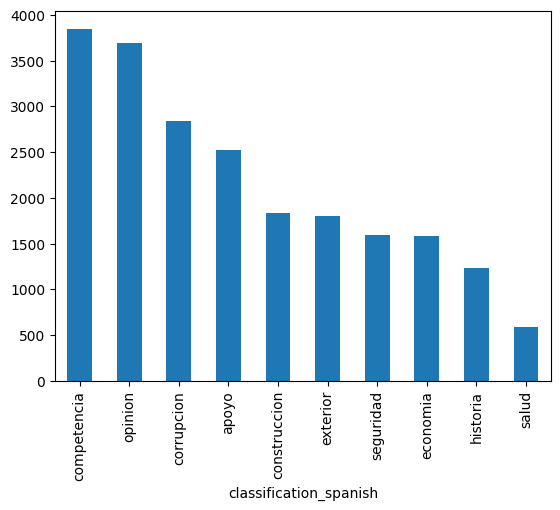

In [72]:
df['classification_spanish'].value_counts().plot(kind='bar')
print(df['classification_spanish'].value_counts())

# Cut data

In [75]:
undersampled = pd.DataFrame(columns=['Texto','classification_spanish'])
undersampled = pd.concat([undersampled, df[df['classification_spanish'] == 'competencia'].sample(1800)])
undersampled = pd.concat([undersampled, df[df['classification_spanish'] == 'opinion'].sample(1800)])
undersampled = pd.concat([undersampled, df[df['classification_spanish'] == 'corrupcion'].sample(1800)])
undersampled = pd.concat([undersampled, df[df['classification_spanish'] == 'apoyo'].sample(1800)])
undersampled = pd.concat([undersampled, df[df['classification_spanish'] == 'construccion'].sample(1800)])
undersampled = pd.concat([undersampled, df[df['classification_spanish'] == 'exterior'].sample(1800)])



df = undersampled

df.reset_index(inplace=True)


In [79]:
df.to_csv('amlo_clasify_chatpgt_10k.csv', index=False)

# Add vector and clean

In [82]:
import spacy 
from spacy import displacy 

nlp = spacy.load("es_core_news_lg")
import nltk
import re
from nltk import word_tokenize
from nltk.corpus import stopwords

stop_words_en= stopwords.words('spanish')
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [83]:
def clean(texto):
    texto = texto.lower()
    texto = re.sub(r'([^0-9A-Za-z-À-ÿ \t])','', texto)
    texto = word_tokenize(texto)
    texto = [palabra for palabra in texto if palabra not in stop_words_en]
    texto = [lemmatizer.lemmatize(palabra) for palabra in texto]
    texto = ' '.join(texto)
    return texto

def vectorize_clean(texto):
    texto = texto.lower()
    texto = re.sub(r'([^0-9A-Za-z-À-ÿ \t])','', texto)
    texto = word_tokenize(texto)
    texto = [palabra for palabra in texto if palabra not in stop_words_en]
    texto = [lemmatizer.lemmatize(palabra) for palabra in texto]
    texto = ' '.join(texto)
    texto = nlp(texto).vector
    return texto

def vectorize(texto):
    texto = nlp(texto).vector
    return texto


In [92]:
df['clean'] = df['Texto'].apply(clean)
df['vector'] = df['clean'].apply(vectorize)

C:\Users\claud\AppData\Local\Temp\ipykernel_17496\1192305580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean'] = df['Texto'].apply(clean)
C:\Users\claud\AppData\Local\Temp\ipykernel_17496\1192305580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vector'] = df['clean'].apply(vectorize)


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Texto                   10800 non-null  object
 1   Clasificacion           219 non-null    object
 2   new_classification      10800 non-null  object
 3   classification_spanish  10800 non-null  object
 4   clean                   10800 non-null  object
 5   vector                  10800 non-null  object
dtypes: object(6)
memory usage: 506.4+ KB


In [96]:
df.to_csv('amlo_clasify_chatpgt_10k.csv', index=False)

In [98]:
df = pd.read_csv('amlo_clasify_chatpgt_10k.csv')

,Texto,Clasificacion,new_classification,classification_spanish,clean,vector
0,"Ha sido muy importante, mucho muy importante t...",NaN,Opposition,competencia,sido importante importante procedimiento ejemp...,[ 5.76126635e-01 7.71860301e-01 1.19198859e-...
1,¿Qué espero del jurado? Vamos a esperar. No q...,NaN,Opposition,competencia,espero jurado vamos esperar quiero hacer ningú...,[-9.68100846e-01 2.17017829e-01 -8.47548902e-...
2,Es muy distinto lo de nuestro movimiento. Aquí...,NaN,Opposition,competencia,distinto movimiento aquí movimiento hablando a...,[ 0.6095007 0.47429207 -0.3994987 -0.942479...
3,"Y sí es un plazo de un mes, ojalá y recapacite...",NaN,Opposition,competencia,plazo me ojalá recapaciten bueno regresaramexi...,[ 0.46241307 0.4259419 -0.6344976 -0.127336...
4,"Entonces, llega él con la bandera del cambio y...",NaN,Opposition,competencia,entonces llega bandera cambio hace romper esqu...,[ 7.66866982e-01 1.09749711e+00 -5.95332265e-...
...,...,...,...,...,...,...
10795,Y en el caso de actividades económicas dar fac...,NaN,Foreign,exterior,caso actividades económicas dar facilidades pe...,[-0.1949131 0.98550135 0.27855945 -1.081047...
10796,"Pero, por ejemplo, en esto de declarar a los n...",NaN,Foreign,exterior,ejemplo declarar narcotraficantes terroristas ...,[ 2.24158928e-01 8.63957047e-01 -1.07975042e+...
10797,"Y luego, porque lo invité, quiere venir él, ta...",NaN,Foreign,exterior,luego invité quiere venir mandó decir si cuánd...,[ 0.2898054 0.5512161 -0.57648766 -0.768501...
10798,"―Le digo: pues tenemos un mitin, venimos a def...",NaN,Foreign,exterior,digo pues mitin venimos defender migrantes tra...,[ 7.82611668e-01 9.04372454e-01 -9.60167468e-...
